# Data Analysing

In [28]:
import numpy as np
import pandas as pd

#### Loading dataset and dropping duplicates if there are any

In [2]:
df = pd.read_csv('data.csv')
df = df.drop_duplicates()
df.head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
5,Exxon Mobil,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,no,no,no,yes,10.0,Darren W. Woods,www.exxonmobil.com,XOM,371841
6,Berkshire Hathaway,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,no,no,no,yes,6.0,Warren E. Buffett,www.berkshirehathaway.com,BRKA,625468
7,Alphabet,8,1.0,257637.0,76033.0,156500.0,Technology,Mountain View,CA,no,no,no,yes,9.0,Sundar Pichai,https://www.abc.xyz,GOOGL,1309359
8,McKesson,9,-2.0,238228.0,-4539.0,67500.0,Health Care,Irving,TX,no,no,no,no,7.0,Brian S. Tyler,www.mckesson.com,MCK,47377
9,AmerisourceBergen,10,-2.0,213988.8,1539.9,40000.0,Health Care,Conshohocken,PA,no,no,no,yes,8.0,Steven H. Collis,www.amerisourcebergen.com,ABC,29972


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

#### Observing that Market Cap column is object, which suppose to be numerical one and looking trough it i obsere that there are some "-" values instead of missing

In [4]:
import numpy as np

# Replace the '-' with NaN in the 'Market Cap' column and convert it to float.
df['Market Cap'] = df['Market Cap'].replace('-', np.nan).astype(float)

numerical_features = df[['revenue', 'profit', 'num. of employees', 'Market Cap']]
numerical_features.describe()



,revenue,profit,num. of employees,Market Cap
count,1000.000000,997.000000,9.990000e+02,9.610000e+02
mean,17986.801400,2026.476329,3.578867e+04,4.002294e+04
std,40813.281554,6421.578081,1.046546e+05,1.309925e+05
min,2107.200000,-6520.000000,1.600000e+02,1.490000e+02
25%,3500.750000,195.400000,6.500000e+03,4.415600e+03
50%,6375.500000,572.000000,1.353000e+04,1.164160e+04
75%,14615.475000,1498.300000,2.890000e+04,3.345560e+04
max,572754.000000,94680.000000,2.300000e+06,2.443962e+06


#### Checking prev_rank column for same issue

In [5]:
count_missing = df['prev_rank'].replace(' ', np.nan).astype(float).isna().sum()
print(f"Missing values in 'prev_rank' column: {count_missing}")

Missing values in 'prev_rank' column: 531


#### Droping 'prev_rank' column as there are half missing values 

In [6]:
df = df.drop('prev_rank', axis=1)

#### For understanding better data i dropped the unuseful columns for the model as they consist of unique information for each company and mapping columns in which there are yes or no values

In [7]:
def preprocess_input(df):
    df = df.copy()

    # Droping unused columns, these columns are not useful for the model, them are unique for each company
    df = df.drop(['company', 'CEO', 'Website', 'Ticker'], axis=1)

    # Mapping yes/no to 1/0
    columns_to_map = ['newcomer', 'ceo_founder', 'ceo_woman', 'profitable']
    for column in columns_to_map:
        df[column] = df[column].map({'yes': 1, 'no': 0})

    return df

df = preprocess_input(df)
df.head(10)

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
0,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,0,0,0,1,352037.0
1,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,0,0,0,1,1202717.0
2,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,0,0,0,1,2443962.0
3,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,0,0,1,1,125204.0
4,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,0,0,0,1,500468.0
5,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,0,0,0,1,371841.0
6,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,0,0,0,1,625468.0
7,8,1.0,257637.0,76033.0,156500.0,Technology,Mountain View,CA,0,0,0,1,1309359.0
8,9,-2.0,238228.0,-4539.0,67500.0,Health Care,Irving,TX,0,0,0,0,47377.0
9,10,-2.0,213988.8,1539.9,40000.0,Health Care,Conshohocken,PA,0,0,0,1,29972.0


#### Looking for missing values


In [8]:
df.isna().sum()

rank                  0
rank_change           0
revenue               0
profit                3
num. of employees     1
sector                0
city                  0
state                 0
newcomer              0
ceo_founder           0
ceo_woman             0
profitable            0
Market Cap           39
dtype: int64

#### Drop any NaN values JUST IN THIS NOTEBOOK FOR BETTER VISUALISING CLEAR DATA, as there are not so much

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               958 non-null    int64  
 1   rank_change        958 non-null    float64
 2   revenue            958 non-null    float64
 3   profit             958 non-null    float64
 4   num. of employees  958 non-null    float64
 5   sector             958 non-null    object 
 6   city               958 non-null    object 
 7   state              958 non-null    object 
 8   newcomer           958 non-null    int64  
 9   ceo_founder        958 non-null    int64  
 10  ceo_woman          958 non-null    int64  
 11  profitable         958 non-null    int64  
 12  Market Cap         958 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 104.8+ KB


#### Checking how many profitable companies there are

In [10]:
df['profitable'].value_counts()


profitable
1    847
0    111
Name: count, dtype: int64

#### There is a distribution of 1/8 of target column, our data is very unbalanced and i should class balance the train data

In [11]:
# Checking rang_change column
df['rank_change'].value_counts()

rank_change
 0.0      527
-2.0       15
 1.0       13
-6.0       12
-7.0       11
         ... 
 74.0       1
 127.0      1
 148.0      1
-69.0       1
-60.0       1
Name: count, Length: 148, dtype: int64

#### Half of companys kept there rank, as for others movements in rank could affect profitability 

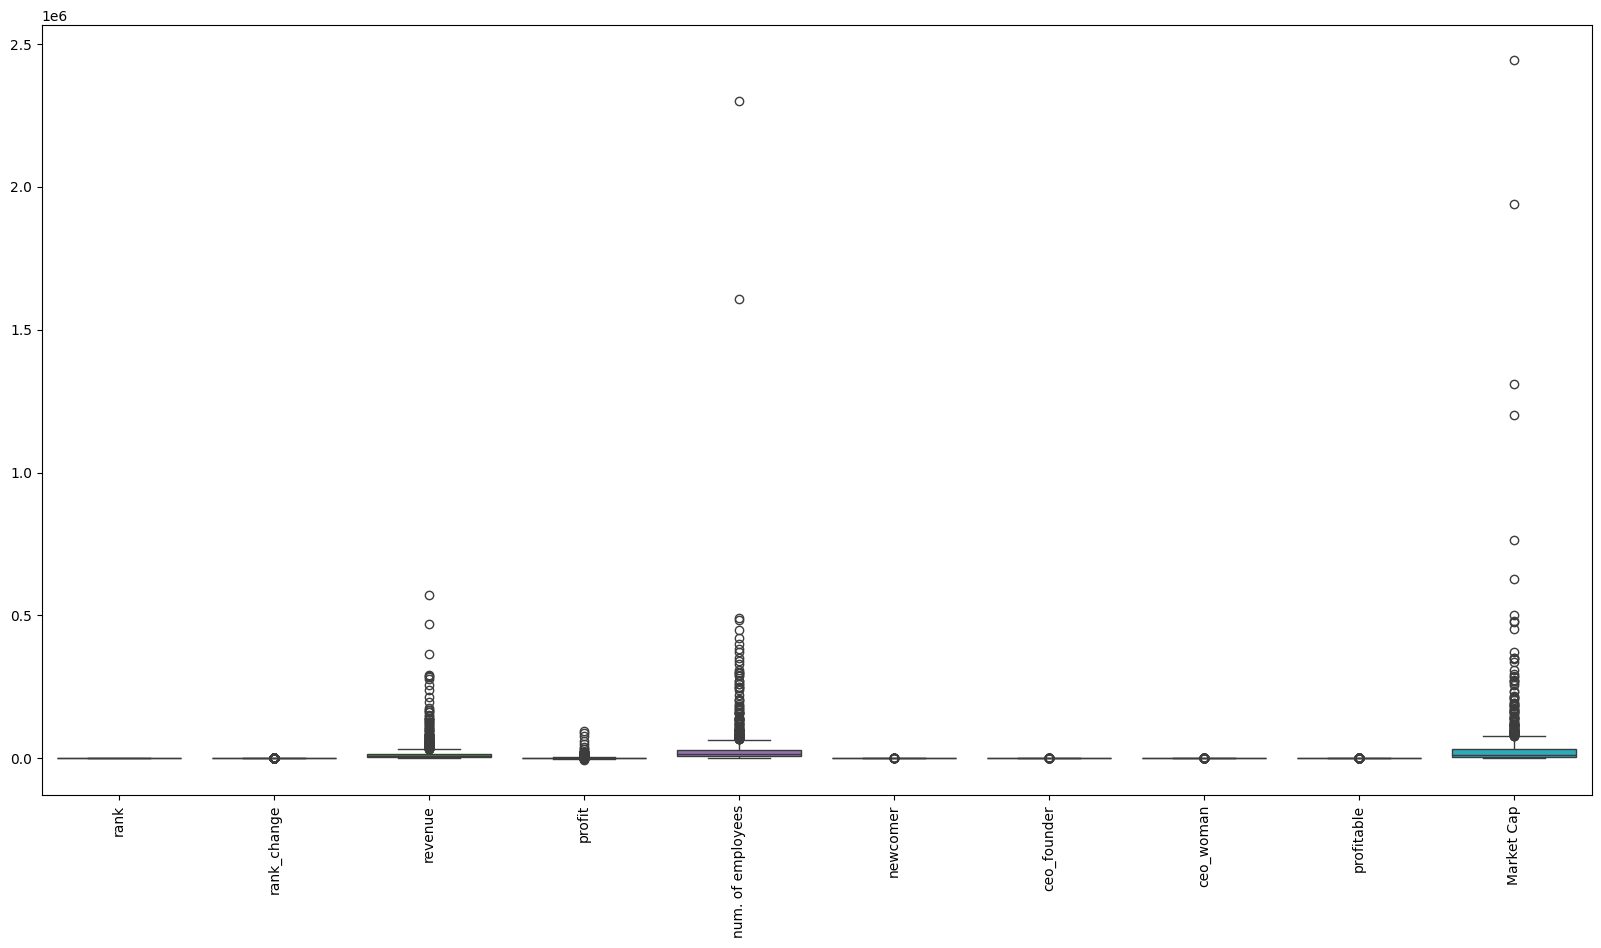

In [12]:
# Detecting outliers with boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


#### We can observe that there are some outliers in "Market Cap" and "num. of employess" column which may be same companies

In [13]:
# How many different values are in the 'rank' column?
df['rank'].nunique()

955

#### As we can see that there are 3 same values in rank column

In [14]:

duplicates = df[df.duplicated(subset=['rank'], keep=False)]
duplicates

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
465,466,-20.0,7156.0,97.0,38000.0,Technology,Atlanta,GA,0,0,0,1,5474.7
466,466,-31.0,7156.0,204.0,25000.0,Materials,Atlanta,GA,0,0,0,1,6154.4
669,670,0.0,4230.0,801.0,6000.0,Business Services,Columbus,OH,0,0,0,1,2804.6
670,670,0.0,4230.0,2126.0,5970.0,Financials,New York,NY,0,0,0,1,7042.2
758,759,0.0,3461.0,903.0,4700.0,"Food, Beverages & Tobacco",Louisville,KY,0,0,0,1,31376.6
759,759,0.0,3461.0,306.3,13000.0,Industrials,Atlanta,GA,0,0,0,1,6628.9


array([[<Axes: title={'center': 'Market Cap'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'profit'}>,
        <Axes: title={'center': 'num. of employees'}>]], dtype=object)

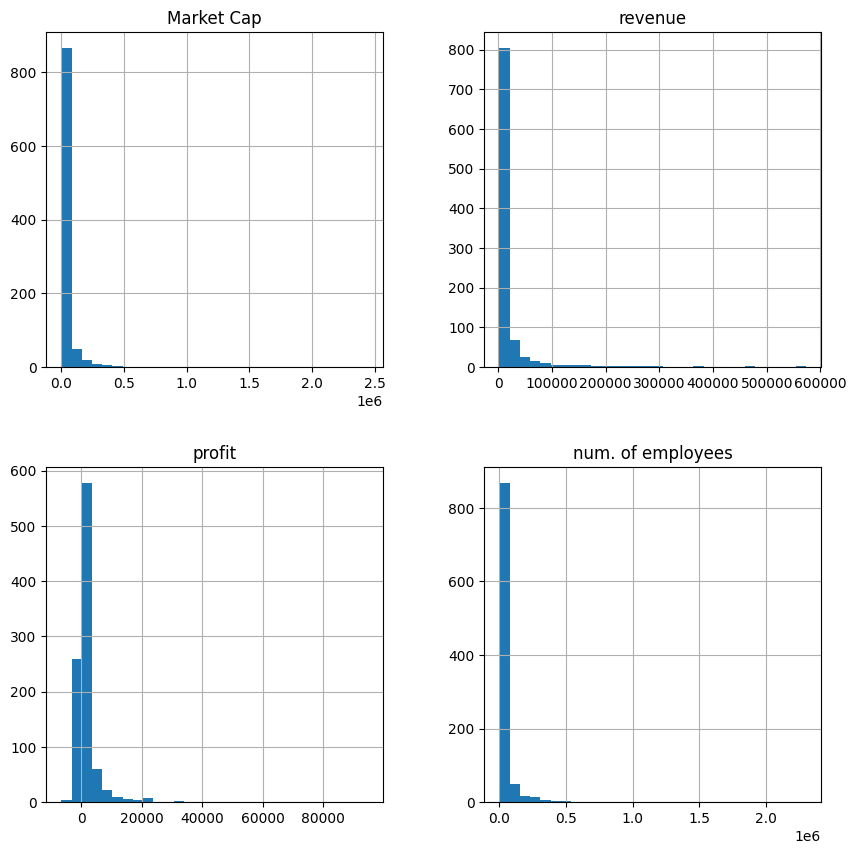

In [15]:
# Histograms
histogram_columns = ['Market Cap', 'revenue', 'profit', 'num. of employees']
df[histogram_columns].hist(bins=30, figsize=(10, 10))

#### As we can see the majority of data is located close to 0, having small "Market Cap", "revenue", "num. of employees" and "profit". This means it does not have a Gaussian distribution and i should normalize it.

<Axes: >

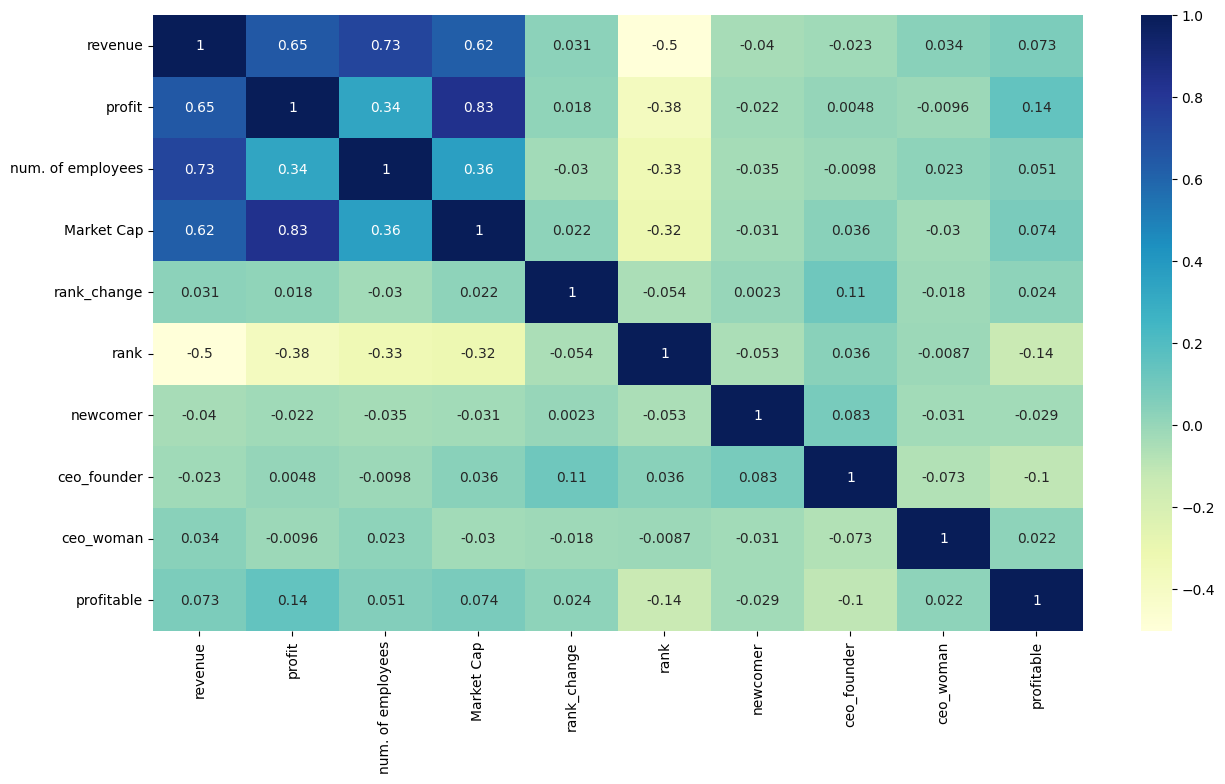

In [16]:
# Correlation matrix
numerical_features = df[['revenue', 'profit', 'num. of employees', 'Market Cap', 'rank_change', 'rank', 'newcomer', 'ceo_founder', 'ceo_woman', 'profitable']]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="YlGnBu")

#### Judging by corelation map we observe that we have high-corelated features in numerical part "Market Cap", "revenue", "num. of employees" "profit"(i should consider multicolinearity issue if the corelattion > 0.8). As well we observe that "rank" column has negative corelation almost with all columns. And the biggest corelation with target column is "profit" which has 0.14

In [17]:
# Group by state and count the number of entries in each state
state_count = df[['sector', 'state', 'profitable']]
state_count = state_count.groupby('state').count()
state_count = state_count.reset_index()
state_count = state_count.rename(columns={'sector': 'company_count'})
# Adding the percentage of profitable companies by state
state_count['profitable'] = df.groupby('state')['profitable'].sum().values
state_count['profitable_percentage'] = state_count['profitable'] / state_count['company_count']
# Printing first 10 by state_count descending
state_count = state_count.sort_values(by='company_count', ascending=False)
state_count.head(20)

,state,company_count,profitable,profitable_percentage
3,CA,129,111,0.860465
40,TX,95,77,0.810526
31,NY,82,73,0.890244
13,IL,60,52,0.866667
32,OH,50,48,0.960000
35,PA,43,34,0.790698
8,FL,37,31,0.837838
42,VA,34,31,0.911765
9,GA,34,33,0.970588
18,MA,31,29,0.935484


#### Looking in each state how many companies are

In [18]:
# Plotting the number of companies by state
import plotly.express as px

fig = px.choropleth(state_count,
                    locations='state', 
                    locationmode='USA-states', 
                    color='company_count', 
                    color_continuous_scale='Oranges', 
                    scope='usa', 
                    title='Number of Companies by State')
fig.show()



#### After plotting company_count we can observe that in 3 states are located 25% of our dataset

In [19]:
# Plotting the percentage of profitable companies by state
fig = px.choropleth(state_count,
                    locations='state', 
                    locationmode='USA-states', 
                    color='profitable_percentage', 
                    color_continuous_scale='Oranges', 
                    scope='usa', 
                    title='Percentage of Profitable Companies by State')
fig.show()

#### Observing that there are lots of states in which there are only profitable companies (positive for our target column)

In [20]:
# Group by sector and count the number of entries in each sector
sector_count = df[['sector', 'state', 'Market Cap', 'profit']]
sector_count = sector_count.groupby('sector').count()
sector_count = sector_count.reset_index()
sector_count = sector_count.rename(columns={'state': 'sector_count'})
# Adding the average market cap by sector
sector_count['Market Cap'] = df.groupby('sector')['Market Cap'].mean().values
# Adding the average profit by sector
sector_count['profit'] = df.groupby('sector')['profit'].mean().values
# Printing first 10 by sector_count descending
sector_count = sector_count.sort_values(by='sector_count', ascending=False)
sector_count.head(10)

,sector,sector_count,Market Cap,profit
6,Financials,135,38060.144444,3896.223704
17,Technology,121,92482.401653,3797.547934
4,Energy,98,30531.962245,1424.161224
9,Health Care,77,61688.240260,2720.031169
16,Retailing,76,40121.335526,1671.063158
2,Business Services,52,38751.971154,1055.657692
12,Industrials,50,20934.798000,862.008000
13,Materials,46,8962.573913,829.919565
19,Transportation,35,23110.202857,1130.528571
8,"Food, Beverages & Tobacco",32,44516.675000,1941.921875


#### Looking trough avg. Market Cap and profit by sector

In [21]:
# Plotting the number of companies by sector
fig = px.bar(sector_count, x='sector', y='sector_count', title='Number of Companies by Sector')
fig.show()

In [22]:
# Plotting the average market cap by sector
fig = px.bar(sector_count, x='sector', y='Market Cap', title='Average Market Cap by Sector')
fig.show()

In [23]:
# Plotting the average profit by sector
fig = px.bar(sector_count, x='sector', y='profit', title='Average profit by Sector')
fig.show()

#### Observing that telecomunications sector is high-profitable and with big Market Cap , despite the fact it count of companies is very low

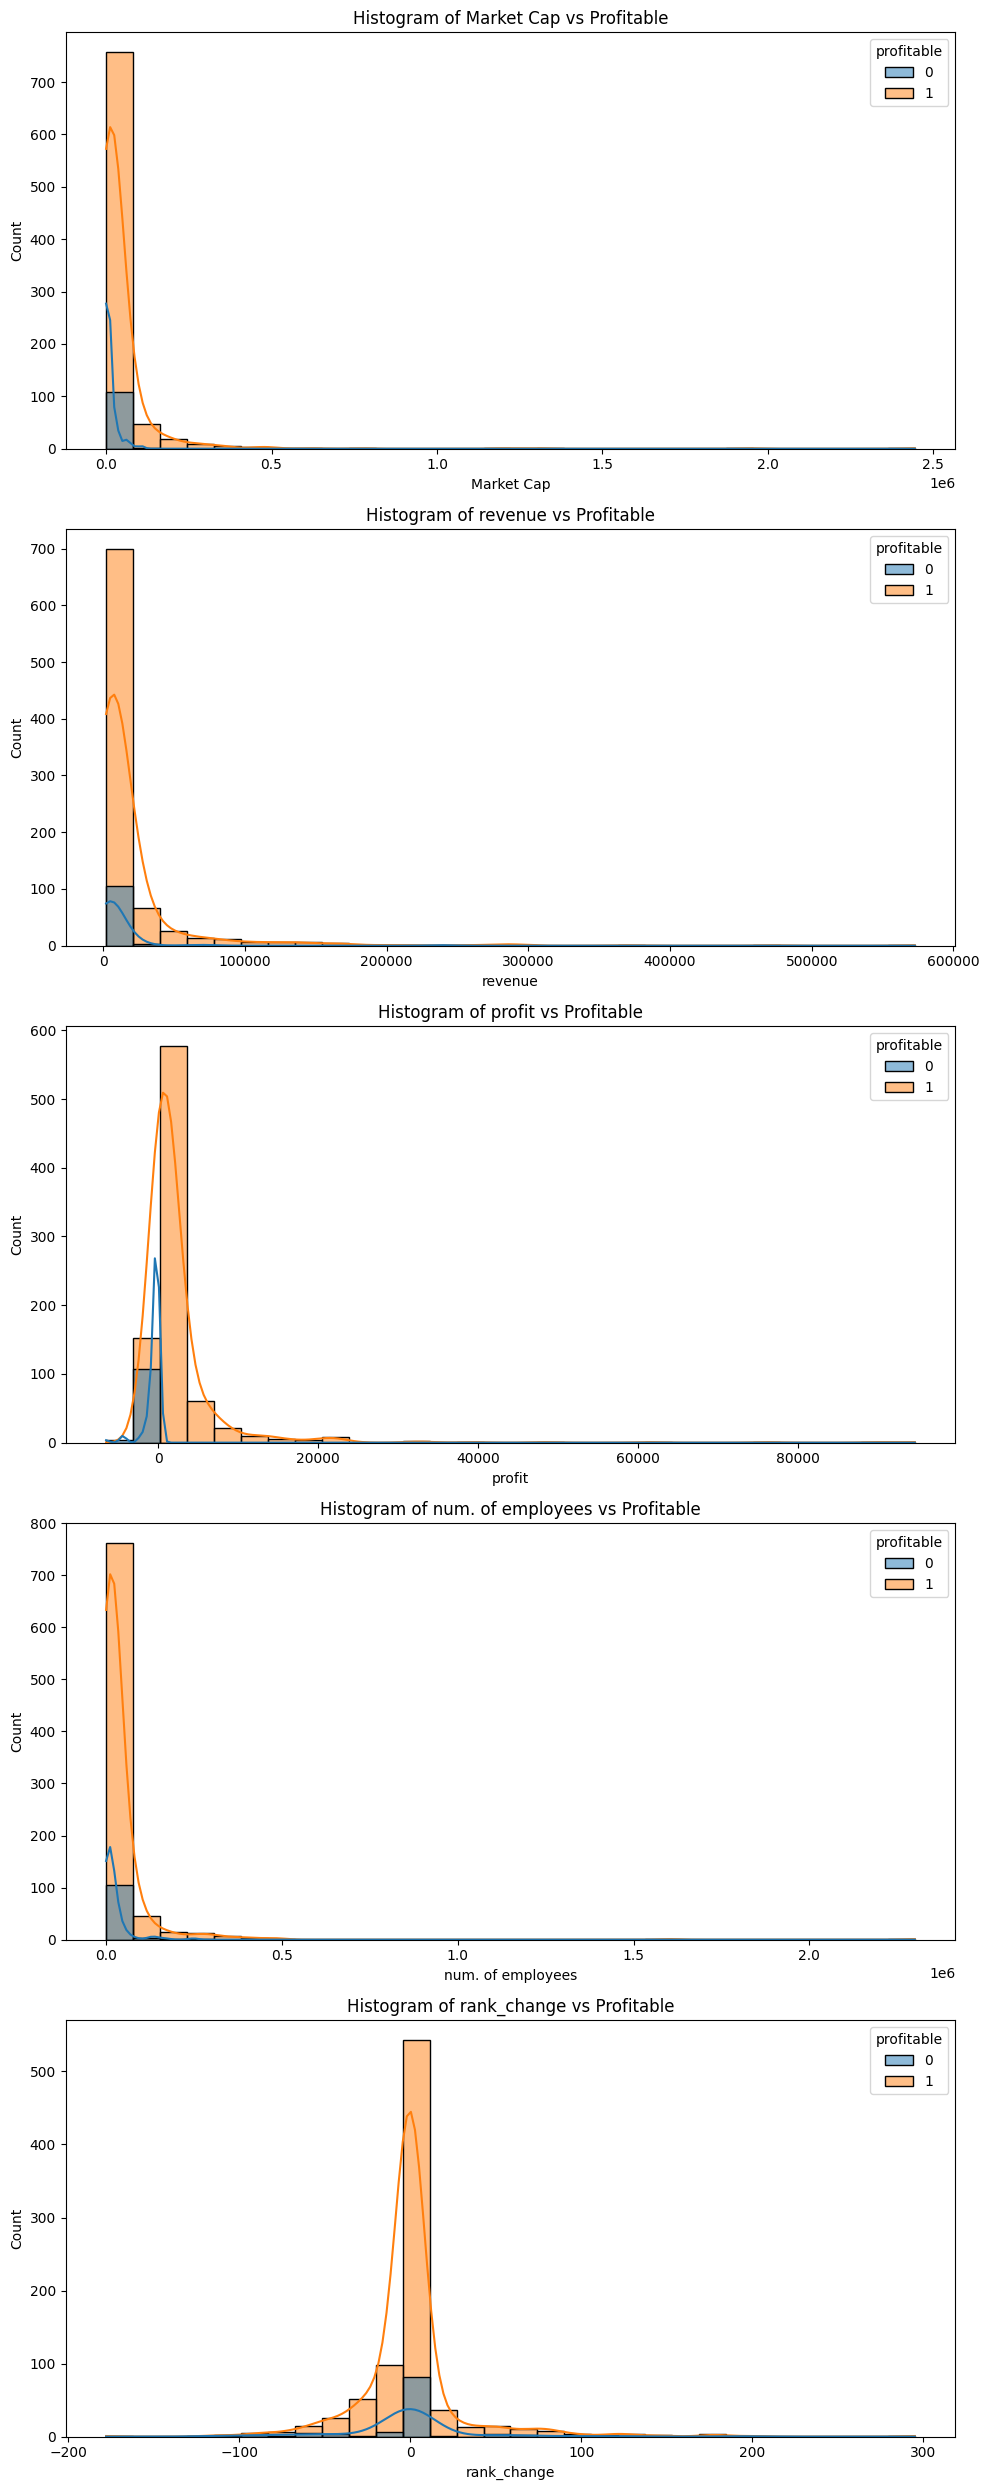

In [24]:
# Plotting histograms for the specified numerical columns correlated with profitability
histogram_columns = ['Market Cap', 'revenue', 'profit', 'num. of employees', 'rank_change']
fig, axes = plt.subplots(nrows=len(histogram_columns), ncols=1, figsize=(10, 5 * len(histogram_columns)))

for col, ax in zip(histogram_columns, axes):
    sns.histplot(x=col, hue='profitable', data=df, kde=True, ax=ax, bins=30)
    ax.set_title(f'Histogram of {col} vs Profitable')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


#### The most important observation is that negative profit is high-corelating with non-profitable companies

In [25]:
# Non-Negative profit and profitable companies
negative_profit_companies = df[df['profit'] <= 0]
count_of_negative_profit_companies = negative_profit_companies['profitable'].value_counts()
count_of_negative_profit_companies



profitable
0    111
Name: count, dtype: int64

#### This means that if profit is not positive the company can't be profitable, as we have in total 111 negative-profitable companies, that is why i decided to remove this column as basically we are trying to predict which already is in our data.

In [26]:
# Negative rank and profitable companies
negative_rank_change_companies = df[df['rank_change'] < 0]
count_of_negative_rank_change_companies = negative_rank_change_companies['profitable'].value_counts()
print('negative_rank_change_companies')
print(count_of_negative_rank_change_companies)

# Positive rank and profitable companies
positive_rank_change_companies = df[df['rank_change'] > 0]
count_of_positive_rank_change_companies = positive_rank_change_companies['profitable'].value_counts()
print('positive_rank_change_companies')
print(count_of_positive_rank_change_companies)


negative_rank_change_companies
profitable
1    245
0     21
Name: count, dtype: int64
positive_rank_change_companies
profitable
1    155
0     10
Name: count, dtype: int64


#### Rank_change column doesn't affect the target column directly

In [27]:
# Negative rank and profitable companies
negative_rank_change_companies = df[df['rank_change'] <= 0]
count_of_negative_rank_change_companies = negative_rank_change_companies['profitable'].value_counts()
print('negative_rank_change_companies')
print(count_of_negative_rank_change_companies)

# Positive rank and profitable companies
positive_rank_change_companies = df[df['rank_change'] > 0]
count_of_positive_rank_change_companies = positive_rank_change_companies['profitable'].value_counts()
print('positive_rank_change_companies')
print(count_of_positive_rank_change_companies)

negative_rank_change_companies
profitable
1    692
0    101
Name: count, dtype: int64
positive_rank_change_companies
profitable
1    155
0     10
Name: count, dtype: int64


#### Changing from df[df['rank_change'] < 0] to df[df['rank_change'] <= 0], we can observe most unprofitable companies have neutral rank_change